#Hands On Machine Learning Chapter 3
#Classification!

We will use the MNIST dataset!

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

In [ ]:
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])



1.   DESCR -> dataset description
2.   data -> one row per example and one column per feature
3.   target -> array of labels


In [ ]:
X, y = mnist["data"], mnist["target"]

In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

> There are 70,000 images and 784 features as each image is 28x28 pixels grayscale.

> Each pixel has a value between 0 (white) and 255 (black).

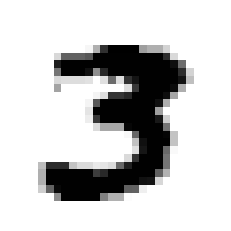

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt


some_digit = X[27]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

That's a 3 if I 'er seen one.

In [ ]:
y[27]

'3'

In [ ]:
y = y.astype(np.uint8)

This MNIST dataset is already split into 60000 (training) and the last 10000(test) images.

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary Classifier


Let us start with a simpler task of identifying if the digit is 5 or not.

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

First, we will use SGD (Stochastic Gradient Descent) which is capable of handling large data sets and also usable for online learning.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Now, let's test it on a digit.

In [ ]:
sgd_clf.predict([some_digit])

array([False])

It predicts a 3 as False! so that's correct :3

# Model Evaluation!

1. Cross Validation

    **split training set into K-folds with 3 parts training and one part test, and compare those results.**

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

**IMPORTANT:** Accuracy is a metric as the ratio of correct predictions.

Results look good, but before we decide that this is the best classifier, let's look a classifier that predicts all images as not-five.

### Dumb classifier

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.91125, 0.90855, 0.90915])

wait, what? That's 90% accuracy on a classifier that predicts the same thing EVERYTIME!!!

That's because out of 70000 images, **only 10% images are of 5s** while the others are **not 5s**.

Hence, if you always predicted that an image is **not 5**, you will be right 90% of times.

In [ ]:
class Always5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.ones((len(X), 1), dtype = bool)

In [ ]:
always_5_clf = Always5Classifier()
cross_val_score(always_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.08875, 0.09145, 0.09085])

As expected, ~8-10% accuracy on a classifier that predicts 5 everytime.

So, this is obviously not a good metric to measure classifier.